# Project Goals and Description
**Project Title:** Netflix Content Analysis
In this project, we performed an exploratory data analysis on Netflix's content catalog to uncover trends,
patterns, and key insights. We worked with a dataset containing thousands of titles, including both Movies and TV Shows,
and analyzed various aspects such as content type, release year, country of origin, duration, rating, and genre.

**Dataset Source:**  
The dataset used in this project was obtained from [Kaggle – Netflix Titles](https://www.kaggle.com/datasets/shivamb/netflix-shows), and contains metadata about Movies and TV Shows available on Netflix up to 2021.

**Objectives:**
- Understand the types of content offered on Netflix (Movies vs TV Shows)
- Analyze trends over time (by year)
- Identify leading countries producing content
- Discover the most popular genres

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Step 2: Initial Data Overview

In [3]:
# Preview the dataset
# Display the first 5 rows to get a quick sense of the data's structure and content
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Display dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# Descriptive statistics for all columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# View column names
# This shows all available columns in the dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Step 3: Data Cleaning

In [7]:
# Create new columns 'duration_minutes' and 'num_seasons' first we need to ensure all values are strings 
df['duration'] = df['duration'].astype(str)

In [8]:
# for movies, extract the number of minutes useing regular expression
df['duration_minutes'] = df['duration'].str.extract(r'(\d+)(?= min)').astype(float)

In [9]:
# for TV shows, extract the number of seasons useing regular expression
df['num_seasons'] = df['duration'].str.extract(r'(\d+)(?= Season)').astype(float)

In [10]:
#check the dataset again and the new columns we created
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,num_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0


In [11]:
# Check for missing values in each column
# After splitting the duration column into two new columns we have new nulls
# that because Movies do not contain informations about seasons and series do not contain information abut minutes. 
df.isnull().sum()

show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
date_added            10
release_year           0
rating                 4
duration               0
listed_in              0
description            0
duration_minutes    2679
num_seasons         6131
dtype: int64

In [12]:
# Drop rows where 'date_added', 'country' and 'rating' is missing
# These fields are important for time and geographic analysis
df.dropna(subset=['date_added', 'country','rating'], inplace=True)

In [13]:
df.isnull().sum()

show_id                0
type                   0
title                  0
director            2214
cast                 671
country                0
date_added             0
release_year           0
rating                 0
duration               0
listed_in              0
description            0
duration_minutes    2277
num_seasons         5690
dtype: int64

In [14]:
# Fill missing values in 'director' and 'cast' columns with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,num_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,NaN
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,NaN,9.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7964 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           7964 non-null   object 
 1   type              7964 non-null   object 
 2   title             7964 non-null   object 
 3   director          7964 non-null   object 
 4   cast              7964 non-null   object 
 5   country           7964 non-null   object 
 6   date_added        7964 non-null   object 
 7   release_year      7964 non-null   int64  
 8   rating            7964 non-null   object 
 9   duration          7964 non-null   object 
 10  listed_in         7964 non-null   object 
 11  description       7964 non-null   object 
 12  duration_minutes  5687 non-null   float64
 13  num_seasons       2274 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 933.3+ KB


In [17]:
# Convert the 'date_added' column to datetime format
# Some values in the 'date_added' column have invalid formats.
# To prevent the program from crashing, we use errors='coerce', which
# converts invalid date entries into NaT (Not a Time)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [18]:
df['date_added'].isnull().sum()

np.int64(85)

In [19]:
# Drop rows with invalid dates in 'date_added' column (those converted to NaT)
df = df[df['date_added'].notnull()]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7879 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7879 non-null   object        
 1   type              7879 non-null   object        
 2   title             7879 non-null   object        
 3   director          7879 non-null   object        
 4   cast              7879 non-null   object        
 5   country           7879 non-null   object        
 6   date_added        7879 non-null   datetime64[ns]
 7   release_year      7879 non-null   int64         
 8   rating            7879 non-null   object        
 9   duration          7879 non-null   object        
 10  listed_in         7879 non-null   object        
 11  description       7879 non-null   object        
 12  duration_minutes  5687 non-null   float64       
 13  num_seasons       2189 non-null   float64       
dtypes: datetime64[ns](1), float64

In [21]:
# Create a new column for the year the content was added to Netflix
df['year_added'] = df['date_added'].dt.year

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,num_seasons,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,NaN,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,NaN,9.0,2021


# Step 4: Data Analysis and Visualization

## Distribution of Movie Durations
- This histogram shows the distribution of movie lengths on Netflix.
- The x-axis represents movie durations in minutes (grouped into bins).
- The y-axis represents how many movies fall into each duration range.
- Most movies are clustered between 80–100 minutes.
- The KDE (curve) provides a smoothed view of the distribution shape.
- Only consider rows where 'duration_minutes' is not null

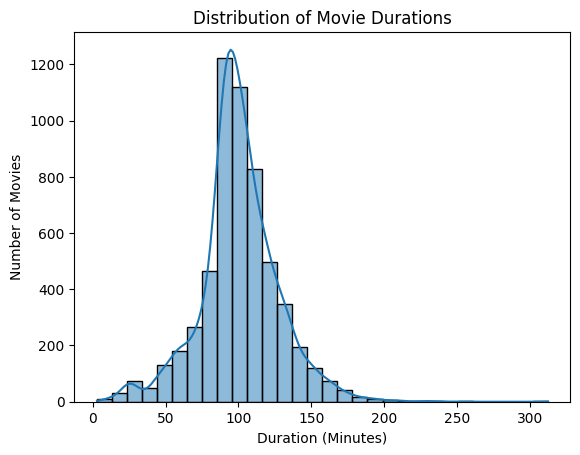

In [23]:
sns.histplot(data=df[df['duration_minutes'].notnull()], x='duration_minutes', bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Number of Movies")
plt.show()

## Number of Seasons in TV Shows
- Plot the distribution of number of seasons for TV Shows
- Only consider rows where 'num_seasons' is not null
-  Most TV shows on Netflix have only **one season**.
- This suggests a high number of **mini-series** or shows that were **not renewed**.
- **Long-running series (4+ seasons)** are relatively rare on the platform.
- This may reflect Netflix’s strategy to:
  - Invest in short-format or experimental content

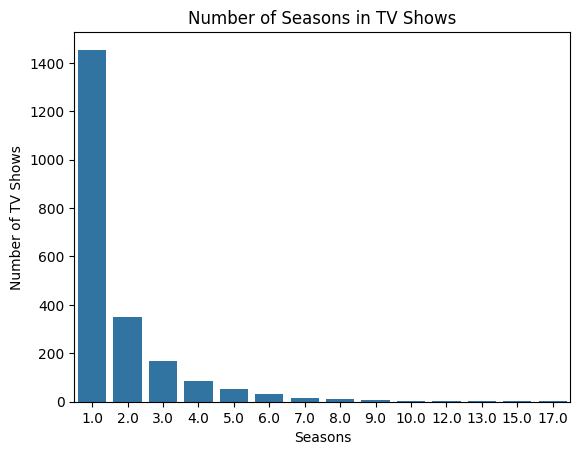

In [24]:
sns.countplot(data=df[df['num_seasons'].notnull()], x='num_seasons')
plt.title("Number of Seasons in TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Number of TV Shows")
plt.show()

## Content Types
- Plot a pie chart showing the distribution of content types (TV Shows vs Movies)
- **Movies** make up the majority of content on the platform.
- **TV Shows** represent a smaller portion, but still a significant presence.

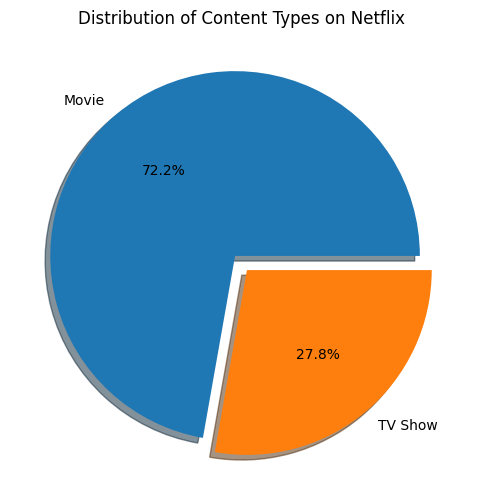

In [25]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 6))
type_counts.plot.pie(autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05])
plt.title("Distribution of Content Types on Netflix")
plt.ylabel("")  # Hide y-axis label
plt.show()

## Top Countries
- Plot the top 10 countries by content count
- The **United States** is by far the leading country in terms of content volume on Netflix.
- **India** comes second, contributing a large number of titles as well.
- Other top contributors include the **United Kingdom**, **Japan**, and **South Korea**.
- The dominance of English-speaking and Asian countries reflects both original production and international licensing strategies.
- This distribution suggests that Netflix invests heavily in content for both Western and Asian markets.

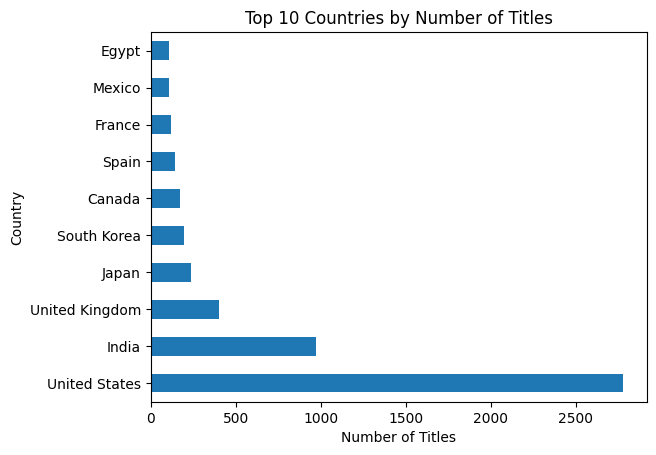

In [26]:
df['country'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

## Most Common Genres
- Split the 'listed_in' column into separate genres and count them
- The most common genre is **International Movies**, showing Netflix’s global content strategy.
- **Dramas** and **Comedies** are also among the most popular genres.
- **International TV Shows** appear frequently, highlighting non-English content.
- The chart shows that Netflix offers a wide range of genres to attract different types of viewers.

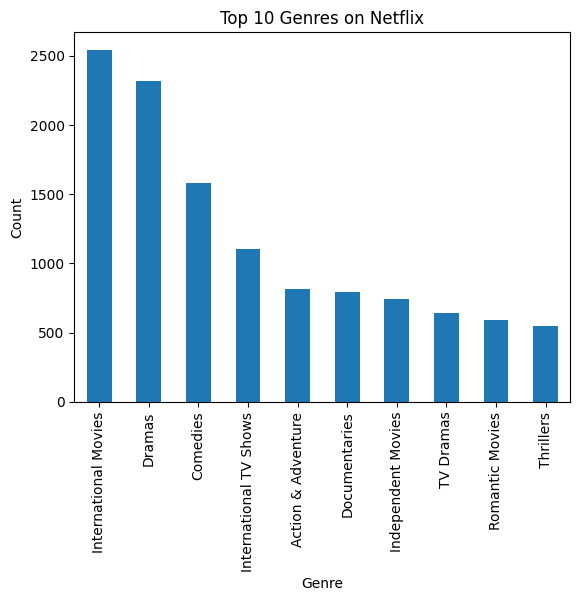

In [27]:
df['listed_in'] = df['listed_in'].astype(str)
genres = df['listed_in'].str.split(', ').explode()
genres.value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

## Relationship between Release Year and Movie Duration
- This scatter plot helps reveal whether older or newer movies tend to be longer or shorter.
- Useful for detecting historical changes in movie production trends.
- In earlier decades (1940–1980), movie durations varied widely — from very short to over 200 minutes.
- From the 2000s onward, most movies cluster between **80 to 120 minutes**, showing a shift toward standardized formats.
- Very long movies (180+ minutes) have become increasingly rare in recent years.
- This trend may reflect modern audience preferences for shorter, more accessible content.

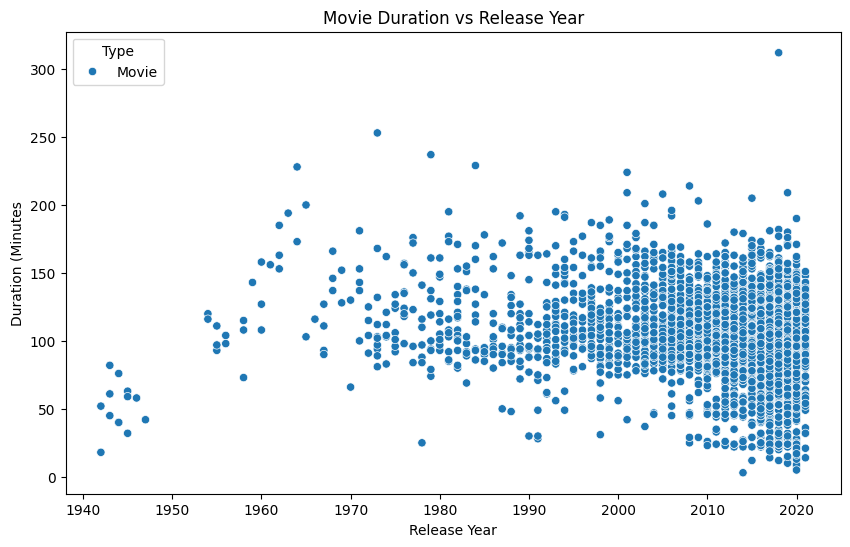

In [30]:
# Create scatter plot:
# - X-axis: release year
# - Y-axis: movie duration (in minutes)
# - hue: color by type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['duration_minutes'].notnull()], x='release_year', y='duration_minutes', hue='type')
plt.title("Movie Duration vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes")
plt.legend(title='Type')
plt.show()

## Genre popularity by content type - Heatmap

- The heatmap shows how frequently each of the top 5 genres was added to Netflix over the years.
- **Dramas** and **Comedies** have consistently been among the most added genres, especially since 2017.
- **International TV Shows** became more prominent starting around 2018–2019, reflecting Netflix’s global expansion.
- **Action & Adventure** and **International Movies** appear less frequently in recent years compared to others.
- The increase in color intensity over time shows that Netflix has added more content overall in recent years, especially after 2016.

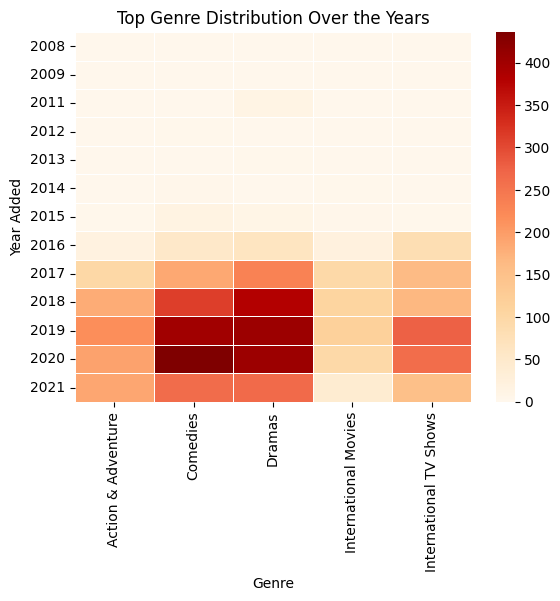

In [32]:
# This heatmap shows how the top genres were distributed across years.
top_genres_heatmap = genres.value_counts().head(5).index

df['primary_genre'] = df['listed_in'].str.extract(f"({'|'.join(top_genres_heatmap)})")
genre_year_ct = pd.crosstab(df['year_added'], df['primary_genre'])
sns.heatmap(genre_year_ct, cmap="OrRd", linewidths=0.5)
plt.title("Top Genre Distribution Over the Years")
plt.xlabel("Genre")
plt.ylabel("Year Added")
plt.show()

## Movie Duration by Country (Subplot)
- **United States** movies are mostly clustered around **90–100 minutes**, with a narrow distribution.
- **India** shows a wider spread, with most movies between **120–150 minutes**, indicating longer average durations.
- **United Kingdom** movies are also mostly in the **90–100 minute** range, but with more variation than the U.S.
- These differences suggest that **regional standards and storytelling formats** influence typical movie lengths.
- Overall, Indian films tend to be longer, while Western countries favor more concise formats.

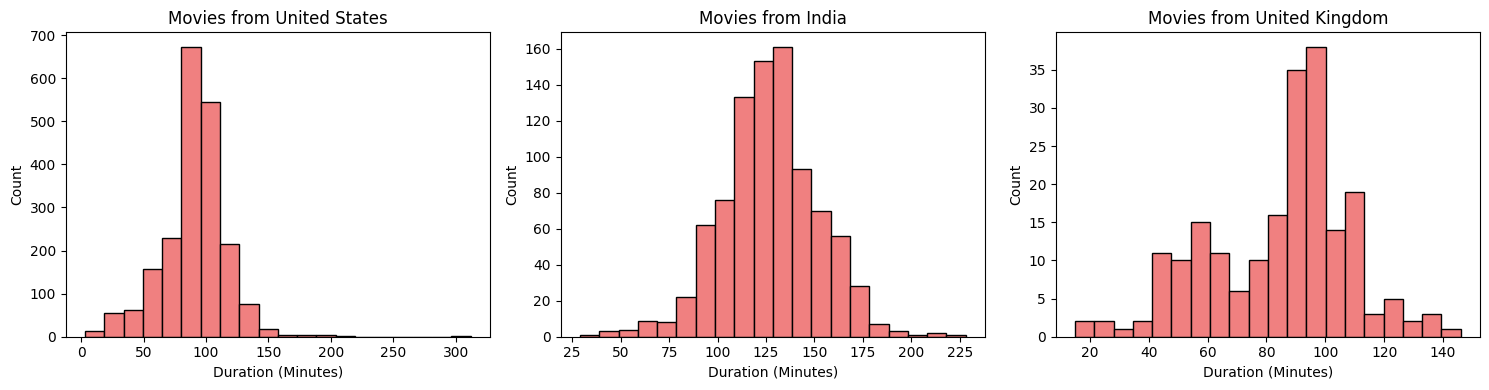

In [34]:
# Uses `value_counts().head(3).index` to get the top 3 countries by number of titles.
# Initializes a figure with `plt.figure()` and defines its size.
# Iterates over the top 3 countries using `enumerate()` in a for-loop.
# Filters the DataFrame to include only:
  # rows of type 'Movie'
  # with the current country
  # and non-null duration values.
    
top_countries = df['country'].value_counts().head(3).index
plt.figure(figsize=(15, 4))

for i, country in enumerate(top_countries, 1):
    subset = df[(df['type'] == 'Movie') & (df['country'] == country) & df['duration_minutes'].notnull()]
    plt.subplot(1, 3, i)
    plt.hist(subset['duration_minutes'], bins=20, color='lightcoral', edgecolor='black')
    plt.title(f"Movies from {country}")
    plt.xlabel("Duration (Minutes)")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


## Grouped Bar Chart: Movies vs TV Shows by Year
- The number of both **Movies** and **TV Shows** added to Netflix increased sharply after 2015.
- **Movies** have consistently outnumbered TV Shows each year.
- The peak of content addition occurred around **2019–2020**.

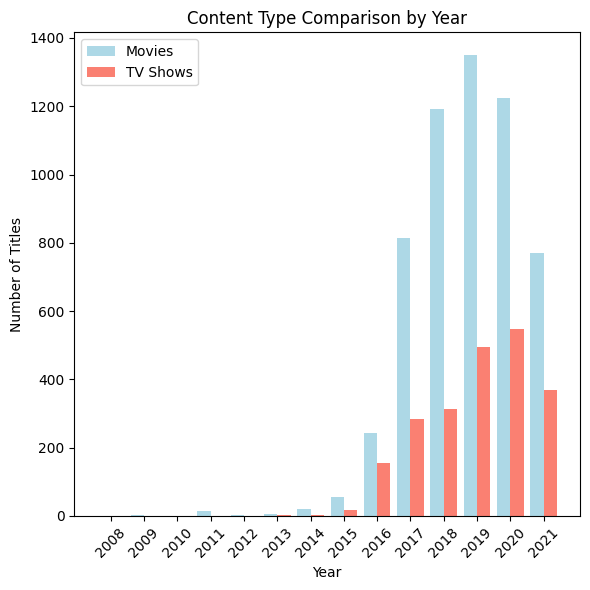

In [36]:
# This grouped bar chart compares the number of Movies and TV Shows added each year.
year_type_counts = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
years = year_type_counts.index.astype(int)
movie_counts = year_type_counts['Movie']
tv_counts = year_type_counts['TV Show']

plt.figure(figsize=(6, 6))
bar_width = 0.4
plt.bar(years - bar_width/2, movie_counts, width=bar_width, label='Movies', color='lightblue')
plt.bar(years + bar_width/2, tv_counts, width=bar_width, label='TV Shows', color='salmon')
plt.title("Content Type Comparison by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Content Type Distribution by Country Chart

- The **United States** leads by a large margin in total content, especially in **Movies**.
- **India** is second, with a relatively balanced mix of Movies and TV Shows.
- In most countries, **Movies** outnumber **TV Shows**, often by a significant margin.
- The chart shows Netflix’s strong content presence in **English-speaking** and **Asian** markets.

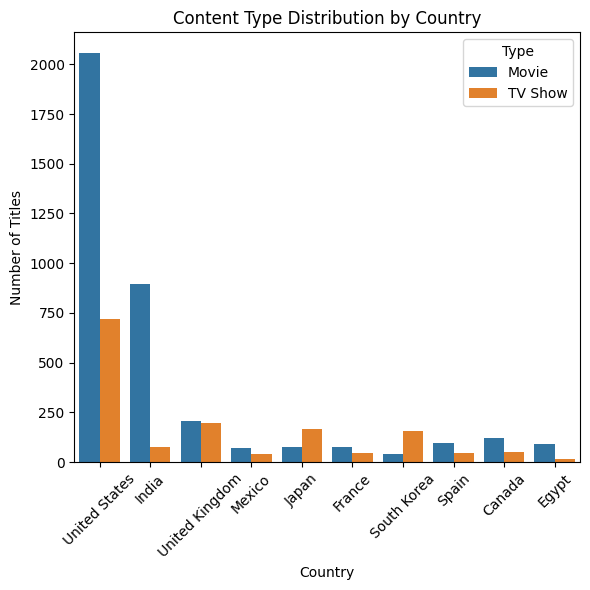

In [41]:
# This bar chart compares the number of Movies and TV Shows for the top 10 countries
from seaborn import countplot

top_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_countries)]

plt.figure(figsize=(6, 6))
sns.countplot(data=df_top_countries, x='country', hue='type')
plt.title("Content Type Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## Top Genres by Country Chart
 - 🇺🇸 United States shows a strong preference for Dramas and Comedies, reflecting a focus on narrative entertainment.
 - 🇮🇳 India leads in International Movies, highlighting its strong local industry with global reach.
 - 🇬🇧 United Kingdom stands out with more Documentaries, suggesting a tilt toward educational or factual content.
 - Each country displays unique genre preferences shaped by cultural and market factors.
 - The genre distribution highlights regional differences in content strategy across Netflix.

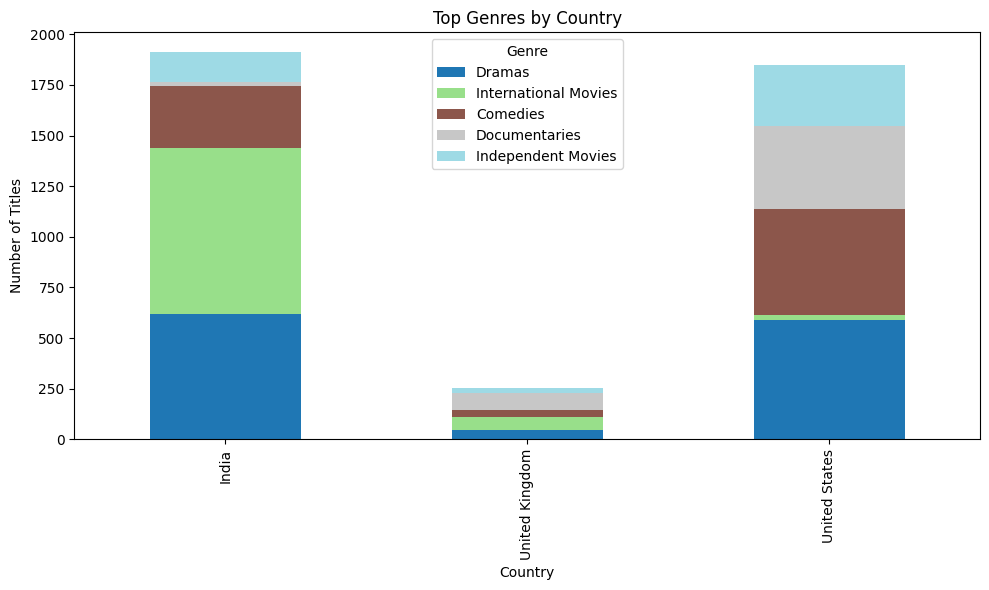

In [43]:
# Analyze top 3 countries and their most common genres

df['listed_in'] = df['listed_in'].astype(str)
genres_expanded = df[['country', 'listed_in']].dropna()
genres_expanded = genres_expanded[genres_expanded['country'].isin(df['country'].value_counts().head(3).index)]
genres_expanded = genres_expanded.assign(genre=genres_expanded['listed_in'].str.split(', ')).explode('genre')

# Create a crosstab (frequency table) for genres by country
genre_country_ct = pd.crosstab(genres_expanded['genre'], genres_expanded['country'])

# Select top 5 genres overall to simplify the chart
top_genres = genres_expanded['genre'].value_counts().head(5).index
genre_country_ct = genre_country_ct.loc[top_genres]

# Plot stacked bar chart
genre_country_ct.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Top Genres by Country")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.tight_layout()
plt.show()


## Distribution of Content Ratings on Netflix:
- **TV-MA** is the most common rating, suggesting that a large portion of Netflix's content is aimed at adult audiences.
- **TV-14** and **PG** ratings show Netflix's effort to also serve families and teens.
- **R** and **NC-17** are less common, possibly due to stricter content restrictions or licensing.
- Overall, the platform features a mix of mature and general-audience content, with a noticeable tilt toward older viewers.

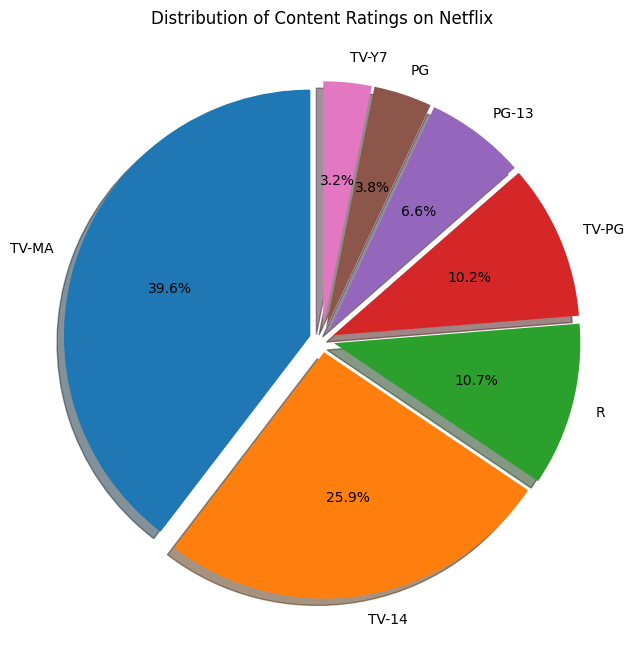

In [48]:
# Count ratings and filter most common
rating_counts = df['rating'].value_counts().head(7) 

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, 
        labels=rating_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        shadow=True, 
        explode=[0.05]*len(rating_counts))  # separation for all slices
plt.title("Distribution of Content Ratings on Netflix")
plt.show()

## Future Directions
1. **User Behavior Integration**  
   Combine the dataset with viewing behavior (e.g., watch time, completion rates) to identify which content features drive engagement.

2. **Recommendation Modeling**  
   Use insights from genre, rating, duration, and region to improve recommendation algorithms tailored to audience segments.

3. **Cultural Representation**  
   Examine diversity across content by analyzing underrepresented regions, languages, and production origins.

4. **Predictive Analytics**  
   Apply time-series models to forecast future content trends, such as demand for specific genres or format shifts.

5. **Platform Comparison (Benchmarking)**  
   Compare Netflix’s catalog with competing platforms like Disney+, HBO Max, or Prime Video to identify strengths, gaps, and unique offerings.

6. **Review & Sentiment Analysis**  
   Integrate external data (e.g., IMDb, Rotten Tomatoes) to study how viewers respond to different genres, ratings, or countries.

7. **Content Lifecycle Analysis**  
   Study how long titles remain on the platform and which factors (e.g., genre, origin, reception) affect removal or retention.

8. **Audience Segmentation by Age**  
    Categorize titles by age suitability (children, teens, families, adults) and assess the balance of offerings across these groups.


**Conclusion:** This analysis offers a strong foundation for understanding Netflix’s content strategy and consumer offerings. By extending this research with additional datasets or deeper modeling, we can generate more actionable insights for media platforms and content creators.